### Comparing profiles ZINC and COCONUT

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import csv
import sys
import numpy as np
sys.path.insert(0,"./../fip3")
from fip import profiles

In [126]:
p = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp_379012.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=379012)
p.df

value
feature1 feature2       
0        0           814
         1           158
         10            6
         1000          4
         1001          3
...                  ...
997      998          16
         999          44
998      998        2788
         999          63
999      999        4474

[2077720 rows x 1 columns]

In [131]:
x = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp_386297.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=386297)
x.df

value
feature1 feature2       
0        0          3426
         1          1169
         10          153
         100          51
         1000         46
...                  ...
997      998           7
         999          18
998      998        3208
         999          96
999      999        7175

[2096060 rows x 1 columns]

In [54]:
self_relations_values_z = p.select_self_relations()['value']
self_relations_values_z

feature1  feature2
0         0             814
1         1           92205
10        10           1689
100       100          1333
1000      1000         2202
                      ...  
995       995          1194
996       996          6790
997       997          6074
998       998          2788
999       999          4474
Name: value, Length: 2048, dtype: int64

In [55]:
self_relations_values_c = x.select_self_relations()['value']
self_relations_values_c

feature1  feature2
0         0             3426
1         1           126721
10        10            7859
100       100           2684
1000      1000          3176
                       ...  
995       995            964
996       996           5560
997       997           3556
998       998           3208
999       999           7175
Name: value, Length: 2048, dtype: int64

In [40]:
p.df['type'] = 'ZINC'

In [56]:
p.select_self_relations()

,,value
feature1,feature2,
0,0,814
1,1,92205
10,10,1689
100,100,1333
1000,1000,2202
...,...,...
995,995,1194
996,996,6790
997,997,6074


In [45]:
x.df['type'] = 'COCONUT'

In [47]:
frames = [p.df,x.df]
merge = pd.concat(frames)

In [48]:
merge

value     type
feature1 feature2                
0        0           814     ZINC
         1           158     ZINC
         10            6     ZINC
         1000          4     ZINC
         1001          3     ZINC
...                  ...      ...
997      998           7  COCONUT
         999          18  COCONUT
998      998        3208  COCONUT
         999          96  COCONUT
999      999        7175  COCONUT

[4173780 rows x 2 columns]

### Comparing stand-alone EFCP-like substructures occurrence in ZINC and COCONUT

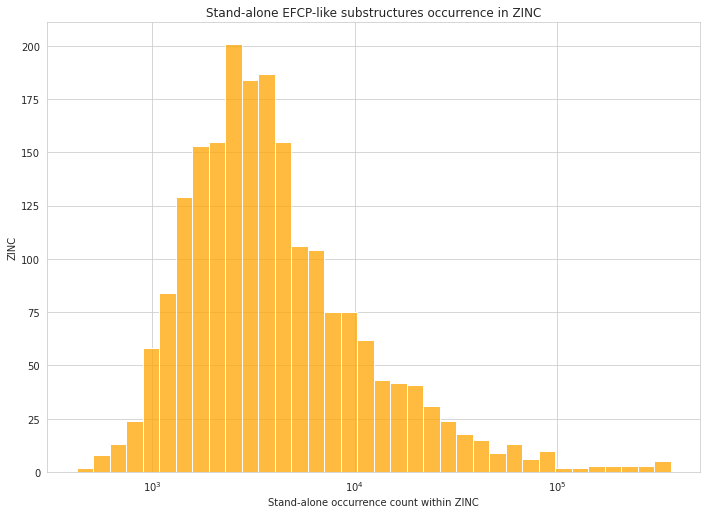

In [120]:
title = f"Stand-alone EFCP-like substructures occurrence in ZINC"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(self_relations_values_z, color = 'orange', log_scale=True)
ax.set(title=title, xlabel=f"Stand-alone occurrence count within ZINC", ylabel=f"ZINC")
plt.savefig(f"../images/comapringZINCandCOCONUT.svg", format="svg")

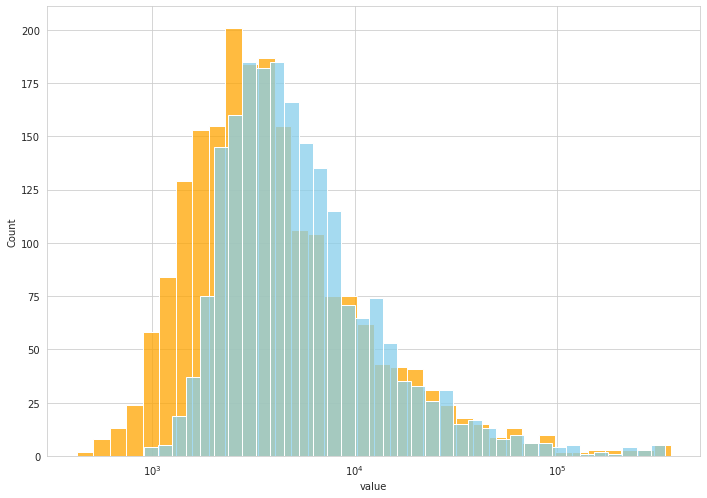

In [163]:
#https://www.python-graph-gallery.com/25-histogram-with-several-variables-seaborn
title = f"Comparing stand-alone EFCP1-like substructures occurrence in ZINC and COCONUT"
sns.set_style("whitegrid")
fig, axs = plt.subplots(figsize=(11.7, 8.27))
sns.histplot(self_relations_values_z, color = "orange", label = 'ZINC', log_scale=True)
sns.histplot(self_relations_values_c, color="skyblue", label="COCONUT", log_scale=True)
ax.set(title=title, xlabel=f"PMI value bins within ZINC and COCONUT", ylabel=f"ECFP1-like substructures counts")
plt.savefig(f"../images/comparingZINCandCOCONUTstandalone.svg", format="svg")

### Comparing PMI of ZINC and COCONUT

In [127]:
p = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(
    p)
p.df

value
feature1 feature2          
0        0         0.002148
         1         0.000417
         10        0.000016
         1000      0.000011
         1001      0.000008
...                     ...
997      998       0.000042
         999       0.000116
998      998       0.007356
         999       0.000166
999      999       0.011804

[2077720 rows x 1 columns]

In [128]:
p = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(p)

p.df

value
feature1 feature2          
0        0         0.000000
         1        -0.325778
         10        0.726008
         1000     -0.241600
         1001     -1.156592
...                     ...
997      998      -1.481562
         999      -0.704465
998      998       0.000000
         999       0.936800
999      999       0.000000

[2077720 rows x 1 columns]

In [132]:
x = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(
    x)
x.df

value
feature1 feature2          
0        0         0.008869
         1         0.003026
         10        0.000396
         100       0.000132
         1000      0.000119
...                     ...
997      998       0.000018
         999       0.000047
998      998       0.008304
         999       0.000249
999      999       0.018574

[2096060 rows x 1 columns]

In [134]:
x = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(x)

x.df

value
feature1 feature2          
0        0         0.000000
         1         0.056805
         10        1.134299
         100       1.099298
         1000      0.707608
...                     ...
997      998      -2.076792
         999      -1.875527
998      998       0.000000
         999       0.688092
999      999       0.000000

[2096060 rows x 1 columns]

In [135]:
pmi_values_z = p.select_raw_interrelations()['value']
pmi_values_z

feature1  feature2
0         1          -0.325778
          10          0.726008
          1000       -0.241600
          1001       -1.156592
          1002       -0.869168
                        ...   
996       998         1.402067
          999        -0.491771
997       998        -1.481562
          999        -0.704465
998       999         0.936800
Name: value, Length: 2075672, dtype: float64

In [136]:
pmi_values_c = x.select_raw_interrelations()['value']
pmi_values_c

feature1  feature2
0         1           0.056805
          10          1.134299
          100         1.099298
          1000        0.707608
          1001        0.233511
                        ...   
996       998         0.448303
          999        -0.962361
997       998        -2.076792
          999        -1.875527
998       999         0.688092
Name: value, Length: 2094012, dtype: float64

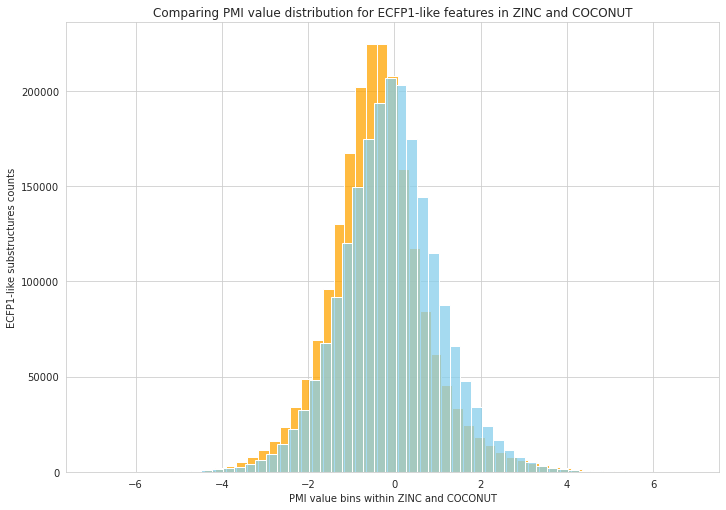

In [161]:
title = f"Comparing PMI value distribution for ECFP1-like features in ZINC and COCONUT"
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.histplot(pmi_values_z, color = "orange", label='ZINC', binwidth=0.25)
sns.histplot(pmi_values_c, color="skyblue", label='COOCNUT',binwidth=0.25)
ax.set(title=title, xlabel=f"PMI value bins within ZINC and COCONUT", ylabel=f"ECFP1-like substructures counts")
plt.savefig(f"../images/comparingZINCandCOCONUTPMI.svg", format="svg")